<a href="https://colab.research.google.com/github/Ayahawadh/Analyzing-Employee-Data/blob/main/Employee_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Data Analysis**

# Importing Libraries
In this step, the libraries used in the project have been loaded.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Reading Data

In [38]:
df = pd.read_csv('https://github.com/Ayahawadh/Analyzing-Employee-Data/raw/main/Employee%20Sample%20Data.csv', encoding='latin-1')


# Explore the data

In [39]:
#Display the header of the DataFrame
df.head()

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47.0,2/5/2022,"$92,368",0%,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58.0,10/23/2013,"$45,703",0%,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34.0,3/24/2019,"$83,576",0%,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39.0,4/7/2018,"$98,062",0%,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42.0,6/18/2005,"$175,391",24%,United States,Austin,NaN


In [40]:
#Display the Trailer of the DataFrame
df.tail()

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
1257,E02250,Mila Han,Manager,Sales,Manufacturing,Female,Asian,54.0,11/14/2009,"$128,791",6%,United States,Miami,NaN
1258,E02251,Genesis Herrera,Manager,IT,Research & Development,Female,Latino,34.0,10/3/2015,"$126,898",10%,Brazil,Manaus,NaN
1259,E02252,Olivia Vazquez,Network Engineer,IT,Specialty Products,Female,Latino,53.0,4/13/2020,"$93,053",0%,Brazil,Sao Paulo,NaN
1260,E02253,Leilani Ng,Systems Analyst,IT,Corporate,Female,Asian,48.0,9/19/2011,"$50,513",0%,United States,Seattle,10/30/2019
1261,E02254,Olivia Mendoza,Sr. Account Representative,Sales,Corporate,Female,Latino,43.0,5/7/2017,"$86,533",0%,United States,Columbus,NaN


In [41]:
#Get the colmuns
df.columns

Index(['Employee ID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date'],
      dtype='object')

In [42]:
df['Business Unit'].unique()

array(['Manufacturing', 'Corporate', 'Research & Development',
       'Specialty Products', nan], dtype=object)

In [43]:
df['Department'].unique()

array(['Engineering', 'Sales', 'IT', 'Accounting', 'Finance', 'Marketing',
       'Human Resources', nan], dtype=object)

In [44]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [45]:
df['Country'].unique()

array(['United States', 'China', 'Brazil', nan], dtype=object)

In [46]:
df['City'].unique()

array(['Columbus', 'Chicago', 'Shanghai', 'Seattle', 'Austin', 'Phoenix',
       'Chongqing', 'Chengdu', 'Miami', 'Beijing', 'Rio de Janeiro',
       'Sao Paulo', 'Manaus', nan], dtype=object)

# Checking the types of data
Here we check for the datatypes and convert the daatypes as needed.

In [47]:
df.dtypes

,0
Employee ID,object
Full Name,object
Job Title,object
Department,object
Business Unit,object
Gender,object
Ethnicity,object
Age,float64
Hire Date,object
Annual Salary,object


In [48]:
#Convert to float

df['Annual Salary'] = df['Annual Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df['Bonus %'] = df['Bonus %'].str.replace('%', '').astype(float)

# Handling the missing and duplicate values
we have identified and handled the missing and duplicate values.

In [49]:
#Check missing values
df.isnull()

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1258,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1259,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1260,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
#How many missing values
df.isnull().sum()

,0
Employee ID,19
Full Name,40
Job Title,58
Department,47
Business Unit,82
Gender,49
Ethnicity,42
Age,6
Hire Date,35
Annual Salary,73


In [51]:
#Dropping the missing values
df = df.dropna()

In [52]:
#Delete dupllicates
df = df.drop_duplicates()

# Validate the cleaned data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 5 to 1039
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    92 non-null     object 
 1   Full Name      92 non-null     object 
 2   Job Title      92 non-null     object 
 3   Department     92 non-null     object 
 4   Business Unit  92 non-null     object 
 5   Gender         92 non-null     object 
 6   Ethnicity      92 non-null     object 
 7   Age            92 non-null     float64
 8   Hire Date      92 non-null     object 
 9   Annual Salary  92 non-null     float64
 10  Bonus %        92 non-null     float64
 11  Country        92 non-null     object 
 12  City           92 non-null     object 
 13  Exit Date      92 non-null     object 
dtypes: float64(3), object(11)
memory usage: 10.8+ KB


In [54]:
df.describe()

,Age,Annual Salary,Bonus %
count,92.000000,92.000000,92.000000
mean,43.532609,100267.304348,6.054348
std,11.067675,51451.935635,10.416981
min,26.000000,41275.000000,0.000000
25%,34.000000,66503.250000,0.000000
50%,43.500000,82934.500000,0.000000
75%,52.000000,125883.500000,9.250000
max,65.000000,257725.000000,37.000000


# Data analysis and Visualization

In [55]:
#Total employees

total_employees = len(df)
print("Total Employees:", total_employees)

Total Employees: 92


In [56]:
#Total Days Employed

df['Hire Date'] = pd.to_datetime(df['Hire Date'])
df['Exit Date'] = pd.to_datetime(df['Exit Date'])


# Use .dt.days to extract the number of days
df['Total Days Employed'] = (df['Exit Date'] - df['Hire Date']).dt.days
df['Employment years'] = (df['Total Days Employed'] / 365).round(2)
df['Employment months'] = (df['Total Days Employed'] / 30).round(2)
print(df[['Employee ID', 'Hire Date', 'Exit Date','Employment months', 'Employment years']])



     Employee ID  Hire Date  Exit Date  Employment months  Employment years
5         E02007 2004-04-22 2014-02-14             119.50              9.82
21        E02023 2013-08-14 2019-03-31              68.50              5.63
36        E02038 2015-09-23 2018-07-27              34.60              2.84
41        E02043 1998-09-26 2016-11-02             220.40             18.12
58        E02060 1999-11-26 2003-11-27              48.73              4.01
...          ...        ...        ...                ...               ...
768       E02770 2020-02-18 2020-06-02               3.50              0.29
774       E02776 2012-09-10 2021-10-07             110.47              9.08
846       E02848 2008-03-03 2022-10-17             178.03             14.63
849       E02851 2014-01-28 2022-06-11             101.87              8.37
1039      E02878 2020-05-19 2021-11-11              18.03              1.48

[92 rows x 5 columns]


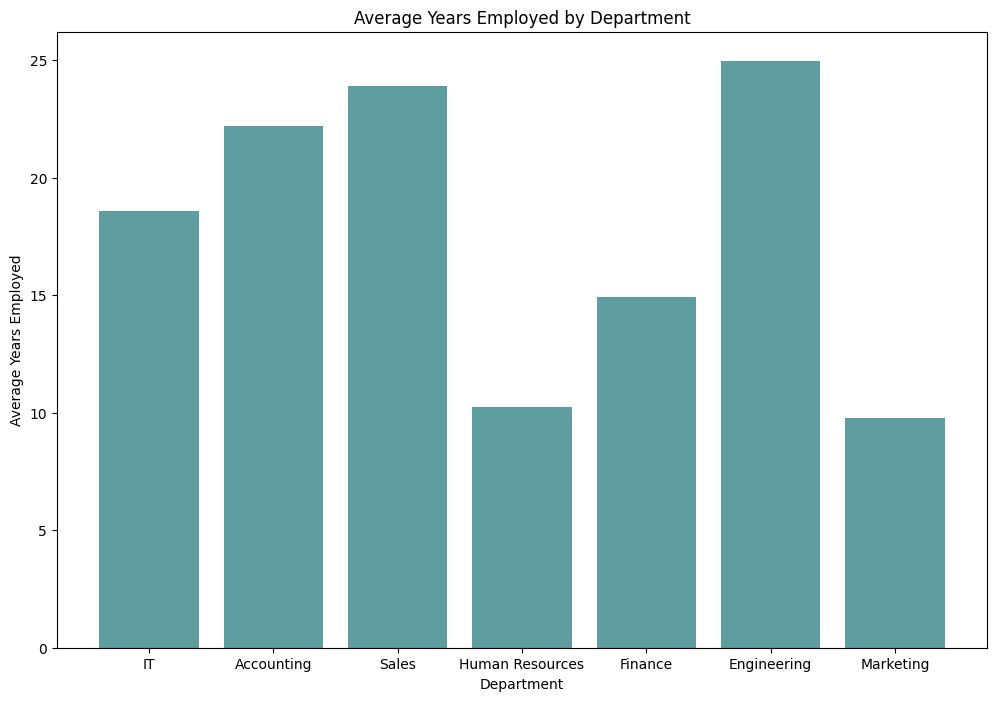

In [57]:
average_years_by_department = df.groupby('Department')['Employment years'].mean()

#Create bar plot

plt.figure(figsize=(12, 8))
plt.bar(df['Department'], df['Employment years'], data=average_years_by_department, color='cadetblue')
plt.xlabel('Department')
plt.ylabel('Average Years Employed')
plt.title('Average Years Employed by Department')
plt.show()

Number of emplyee by
Department
IT                 31
Engineering        13
Accounting         12
Human Resources    12
Finance            11
Sales               8
Marketing           5
Name: count, dtype: int64
Number of emplyee by
Business Unit
Manufacturing             25
Specialty Products        24
Research & Development    23
Corporate                 20
Name: count, dtype: int64
Number of emplyee by
City
Austin            17
Seattle           15
Miami             13
Phoenix            8
Columbus           7
Rio de Janeiro     5
Chicago            5
Beijing            5
Shanghai           4
Chongqing          4
Chengdu            4
Sao Paulo          3
Manaus             2
Name: count, dtype: int64


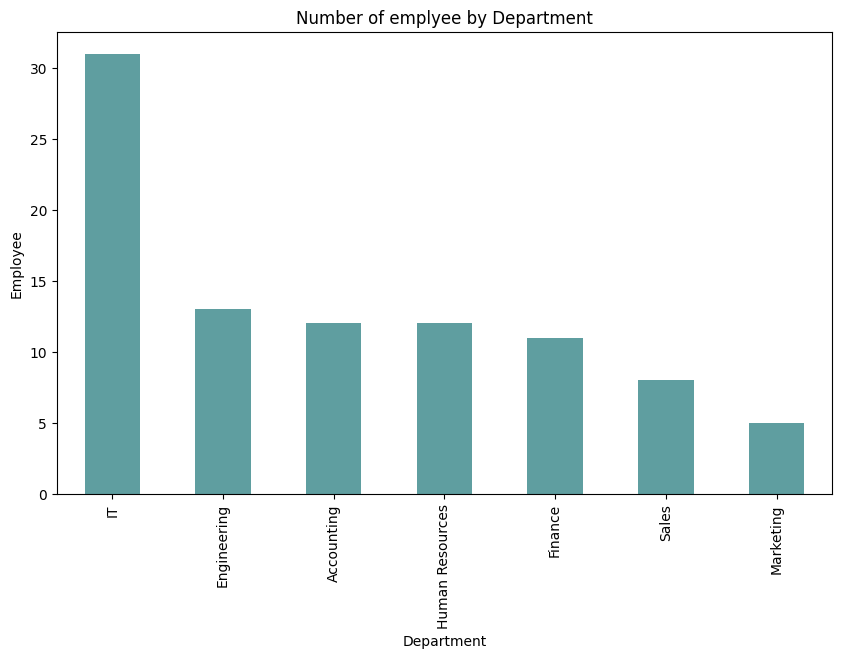

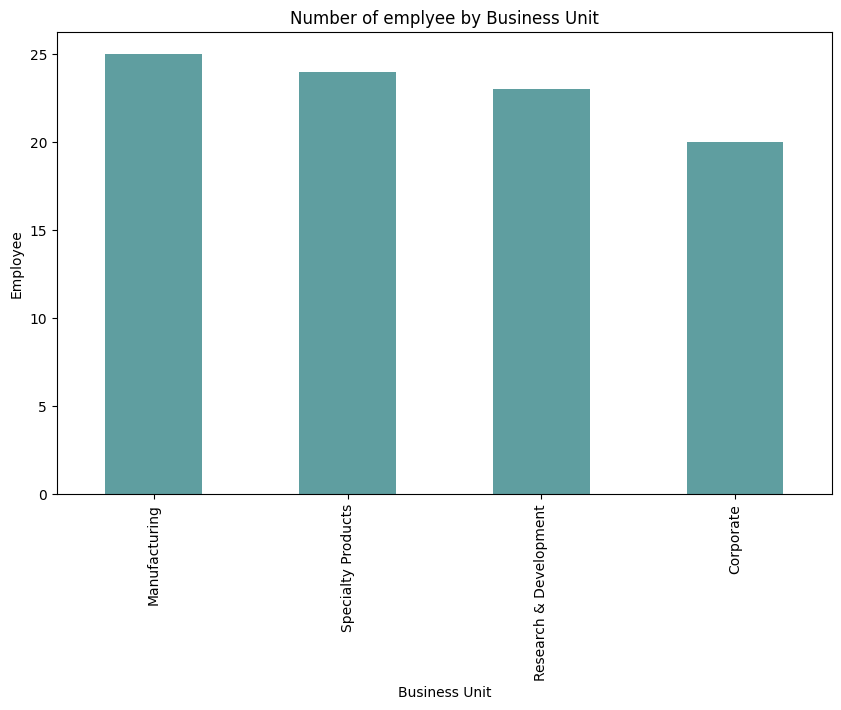

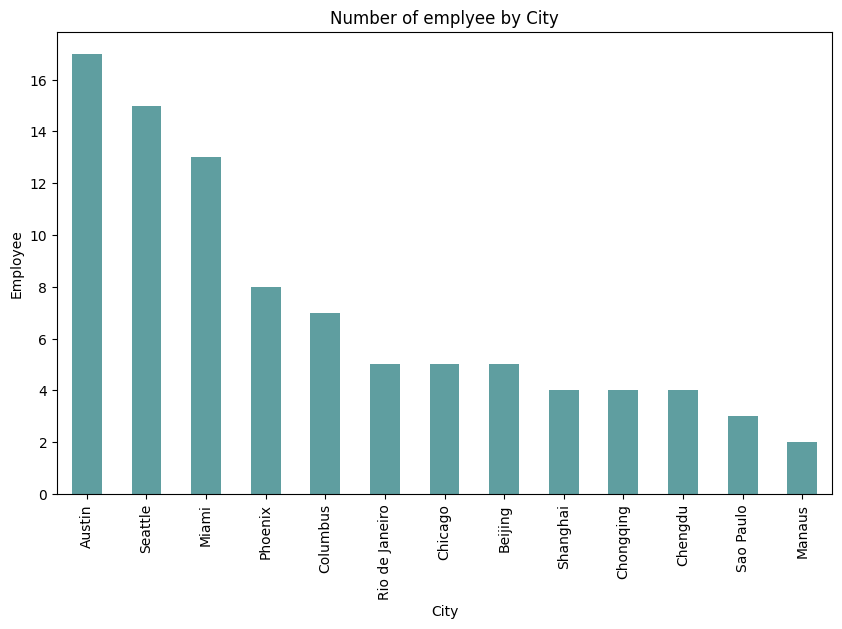

In [58]:
column = ['Department', 'Business Unit', 'City']

for col in column:
    print('Number of emplyee by')
    print(df[col].value_counts())

#Create bar plot
for col in column:
  plt.figure(figsize=(10,6))
  df[col].value_counts().plot(kind='bar',color='cadetblue')
  plt.xlabel(col)
  plt.ylabel('Employee')
  plt.title(f'Number of emplyee by {col}')
  plt.show()

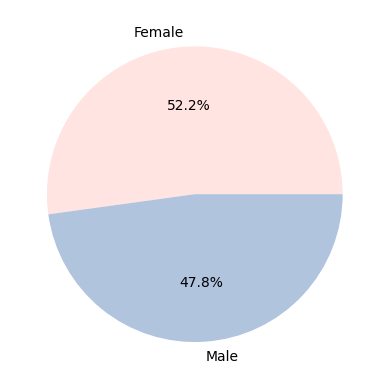

In [59]:
#Pie chart
y = np.array(df['Gender'].value_counts())
mylabels = ['Female', 'Male']
plt.pie(y, labels = mylabels, autopct='%1.1f%%',colors=('mistyrose','lightsteelblue'))
plt.show()

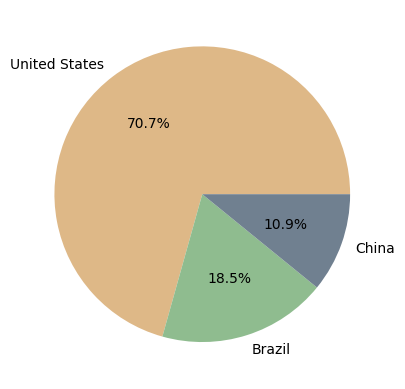

In [60]:
#Pie chart
x = np.array(df['Country'].value_counts())
mylabels = df['Country'].unique()
plt.pie(x, labels = mylabels, autopct='%1.1f%%',colors=('burlywood','darkseagreen','slategrey'))
plt.show()

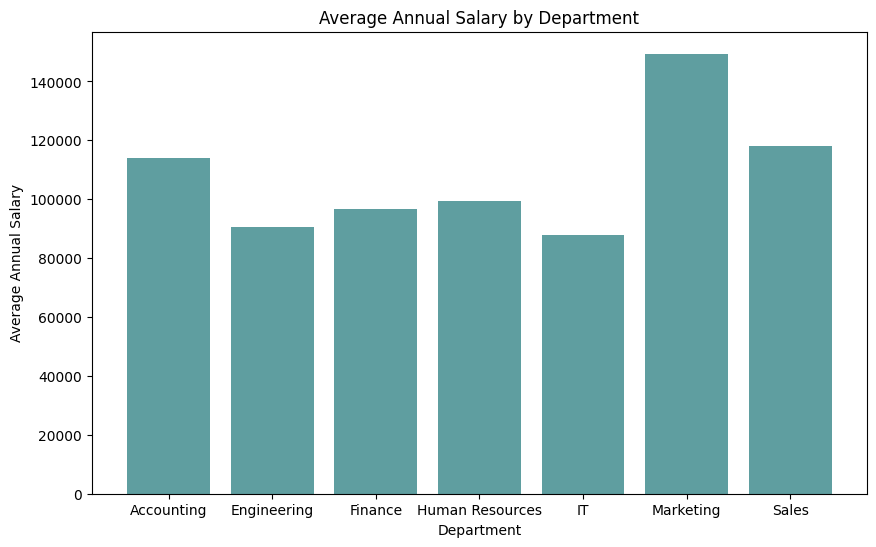

In [61]:
#Bar Plot for Average Annual Salary for each Department

#Calculate the average annual salary for each department
avg_salary = df.groupby('Department')['Annual Salary'].mean()

#Create bar plot
plt.figure(figsize=(10,6))
plt.bar(avg_salary.index,avg_salary.values, color='cadetblue')

plt.xlabel('Department')
plt.ylabel('Average Annual Salary')
plt.title('Average Annual Salary by Department')
plt.show()

In [62]:
#Is there a difference between the salaries of male and female employees? By using T-test
male_salary = df[df['Gender'] == 'Male']['Annual Salary']
female_salary = df[df['Gender'] == 'Female']['Annual Salary']

#First: Checking equal variances

print('P-value is:', stats.levene(male_salary, female_salary)[1])

if stats.levene(male_salary, female_salary)[1] > 0.05:
    print("Variances are equal")
else:
    print("Variances are not equal")


#Second: Calclaute P-value for T-test

p_value_T = stats.ttest_ind(male_salary, female_salary, equal_var=True)

print('P-value for T-test:', p_value_T.pvalue)

if p_value_T.pvalue > 0.05:
    print("There is no significant difference between the salaries of male and female employees.")
else:
    print("There is a significant difference between the salaries of male and female employees.")


P-value is: 0.09356629151975517
Variances are equal
P-value for T-test: 0.08077755396446769
There is no significant difference between the salaries of male and female employees.


In [63]:
#Is there a correlation between Employment years and Salary?

df[['Employment years','Annual Salary']].corr()


,Employment years,Annual Salary
Employment years,1.000000,0.046495
Annual Salary,0.046495,1.000000
